In [1]:
from pycelonis import get_celonis
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pycelonis.celonis_api.pql.pql import PQLColumn
from pycelonis.celonis_api.pql.pql import PQL

In [3]:
import pm4py
import pandas as pd
from algorithm_ranking import RankVariantsDFGTr, RankVariantsSort2, MeasurementsVisualizer
import random
from variants_compare import VariantsCompare

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
celonis = get_celonis(
    url="https://academic-aravind-sankaran-rwth-aachen-de.eu-2.celonis.cloud",
    api_token = "OWIyODI0ZTYtZDYyMS00N2QwLTk1ZTEtN2ZhN2U3NGYzYjg0Okp2a3FQeUNNanovVjM0K0ZHTVNpbTJPQWt1Y2RtZGdINlR2THRDbHd3Y1By"
)

[2023-06-07 13:06:27] WARNING: Argument 'key_type' not set, defaults to 'APP_KEY'. Must be one of [USER_KEY, APP_KEY].


[2023-06-07 13:06:27] INFO: Initial connect successful! You are using an Application Key. PyCelonis Version: 1.7.0
[2023-06-07 13:06:27] INFO: Your key has following permissions:
[
    {
        "permissions": [],
        "serviceName": "package-manager"
    },
    {
        "permissions": [],
        "serviceName": "workflows"
    },
    {
        "permissions": [],
        "serviceName": "task-mining"
    },
    {
        "permissions": [],
        "serviceName": "action-engine"
    },
    {
        "permissions": [],
        "serviceName": "team"
    },
    {
        "permissions": [],
        "serviceName": "process-repository"
    },
    {
        "permissions": [],
        "serviceName": "process-analytics"
    },
    {
        "permissions": [],
        "serviceName": "transformation-center"
    },
    {
        "permissions": [],
        "serviceName": "storage-manager"
    },
    {
        "permissions": [
            "$ACCESS_CHILD"
        ],
        "serviceName": "event-co

In [5]:
sap_p2p = celonis.datamodels[1]

In [6]:
query = PQL()
query += PQLColumn(query='"_CEL_P2P_ACTIVITIES_EN_parquet"."_CASE_KEY"', name="case:concept:name")
query += PQLColumn(query='"_CEL_P2P_ACTIVITIES_EN_parquet"."ACTIVITY_EN"', name="concept:name")
query += PQLColumn(query=' VARIANT ( "_CEL_P2P_ACTIVITIES_EN_parquet"."ACTIVITY_EN" )', name="case:variant")
query += PQLColumn(query='"_CEL_P2P_ACTIVITIES_EN_parquet"."EVENTTIME"', name="timestamp")

In [7]:
df = sap_p2p._get_data_frame(query)

[2023-06-07 13:06:34] INFO: PQL Export started...
[2023-06-07 13:06:35] INFO: PQL Export status: DONE


In [8]:
df

,case:concept:name,concept:name,case:variant,timestamp
0,800000000006800001,Create Purchase Requisition Item,"Create Purchase Requisition Item, Create Purch...",2008-12-31 07:44:05
1,800000000006800001,Create Purchase Order Item,"Create Purchase Requisition Item, Create Purch...",2009-01-02 07:44:05
2,800000000006800001,Print and Send Purchase Order,"Create Purchase Requisition Item, Create Purch...",2009-01-05 07:44:05
3,800000000006800001,Receive Goods,"Create Purchase Requisition Item, Create Purch...",2009-01-12 07:44:05
4,800000000006800001,Scan Invoice,"Create Purchase Requisition Item, Create Purch...",2009-01-20 07:44:05
...,...,...,...,...
1694393,800000002797100004,Create Purchase Order Item,"Create Purchase Order Item, Print and Send Pur...",2009-09-24 15:33:03
1694394,800000002797100004,Print and Send Purchase Order,"Create Purchase Order Item, Print and Send Pur...",2009-09-26 15:33:03
1694395,800000002797100004,Receive Goods,"Create Purchase Order Item, Print and Send Pur...",2009-10-03 15:33:03
1694396,800000002797100004,Scan Invoice,"Create Purchase Order Item, Print and Send Pur...",2009-10-09 15:33:03


In [9]:
df.to_csv('sap_p2p_data.csv')

In [77]:
log = pm4py.convert_to_event_log(df)

In [11]:
net, im, fm = pm4py.discover_petri_net_inductive(log)

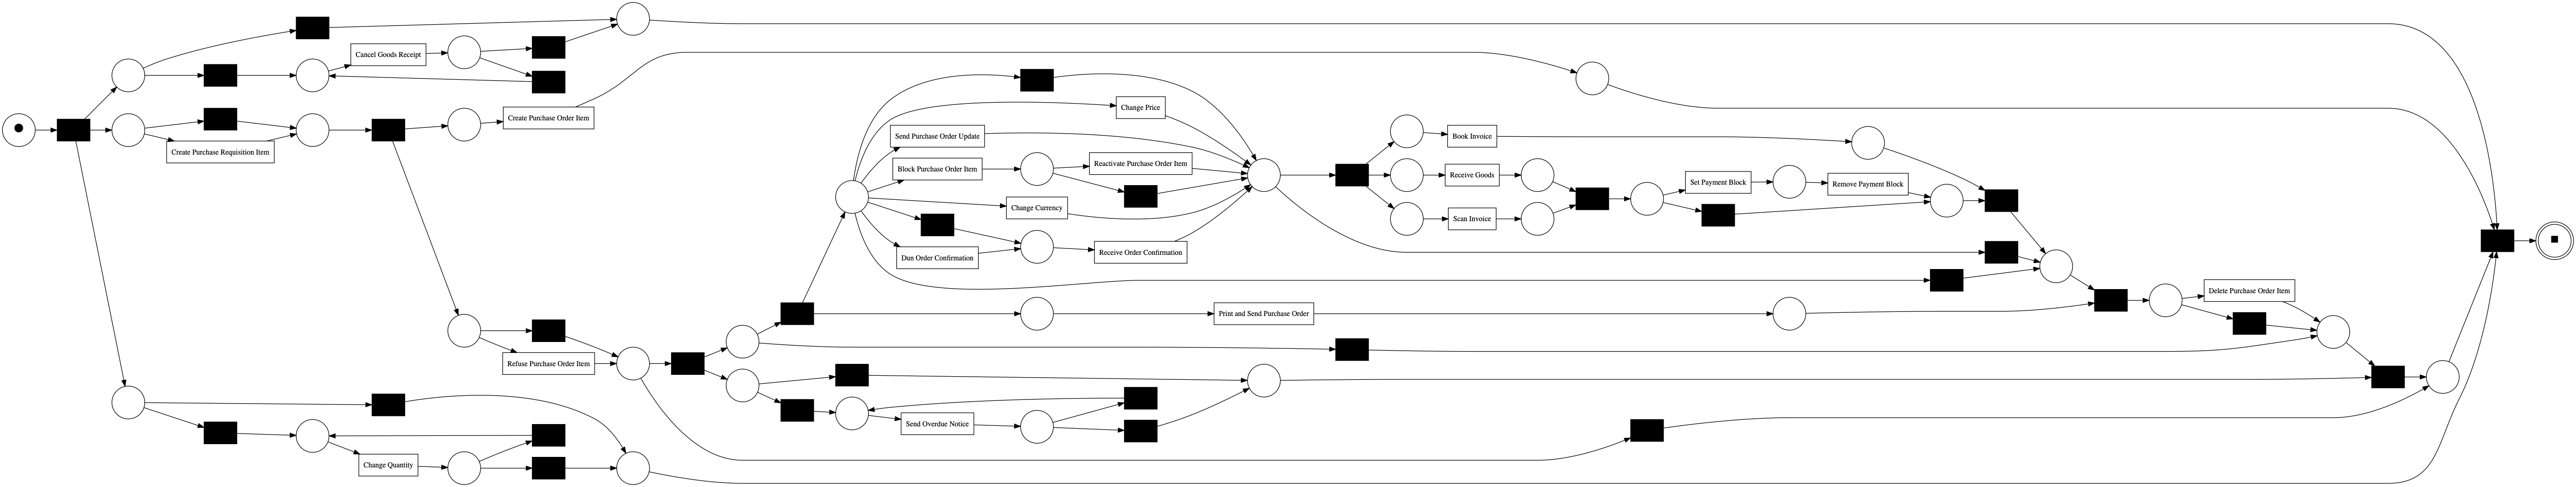

In [12]:
pm4py.view_petri_net(net,im,fm)

In [13]:
net, im, fm = pm4py.discover_dfg(log)

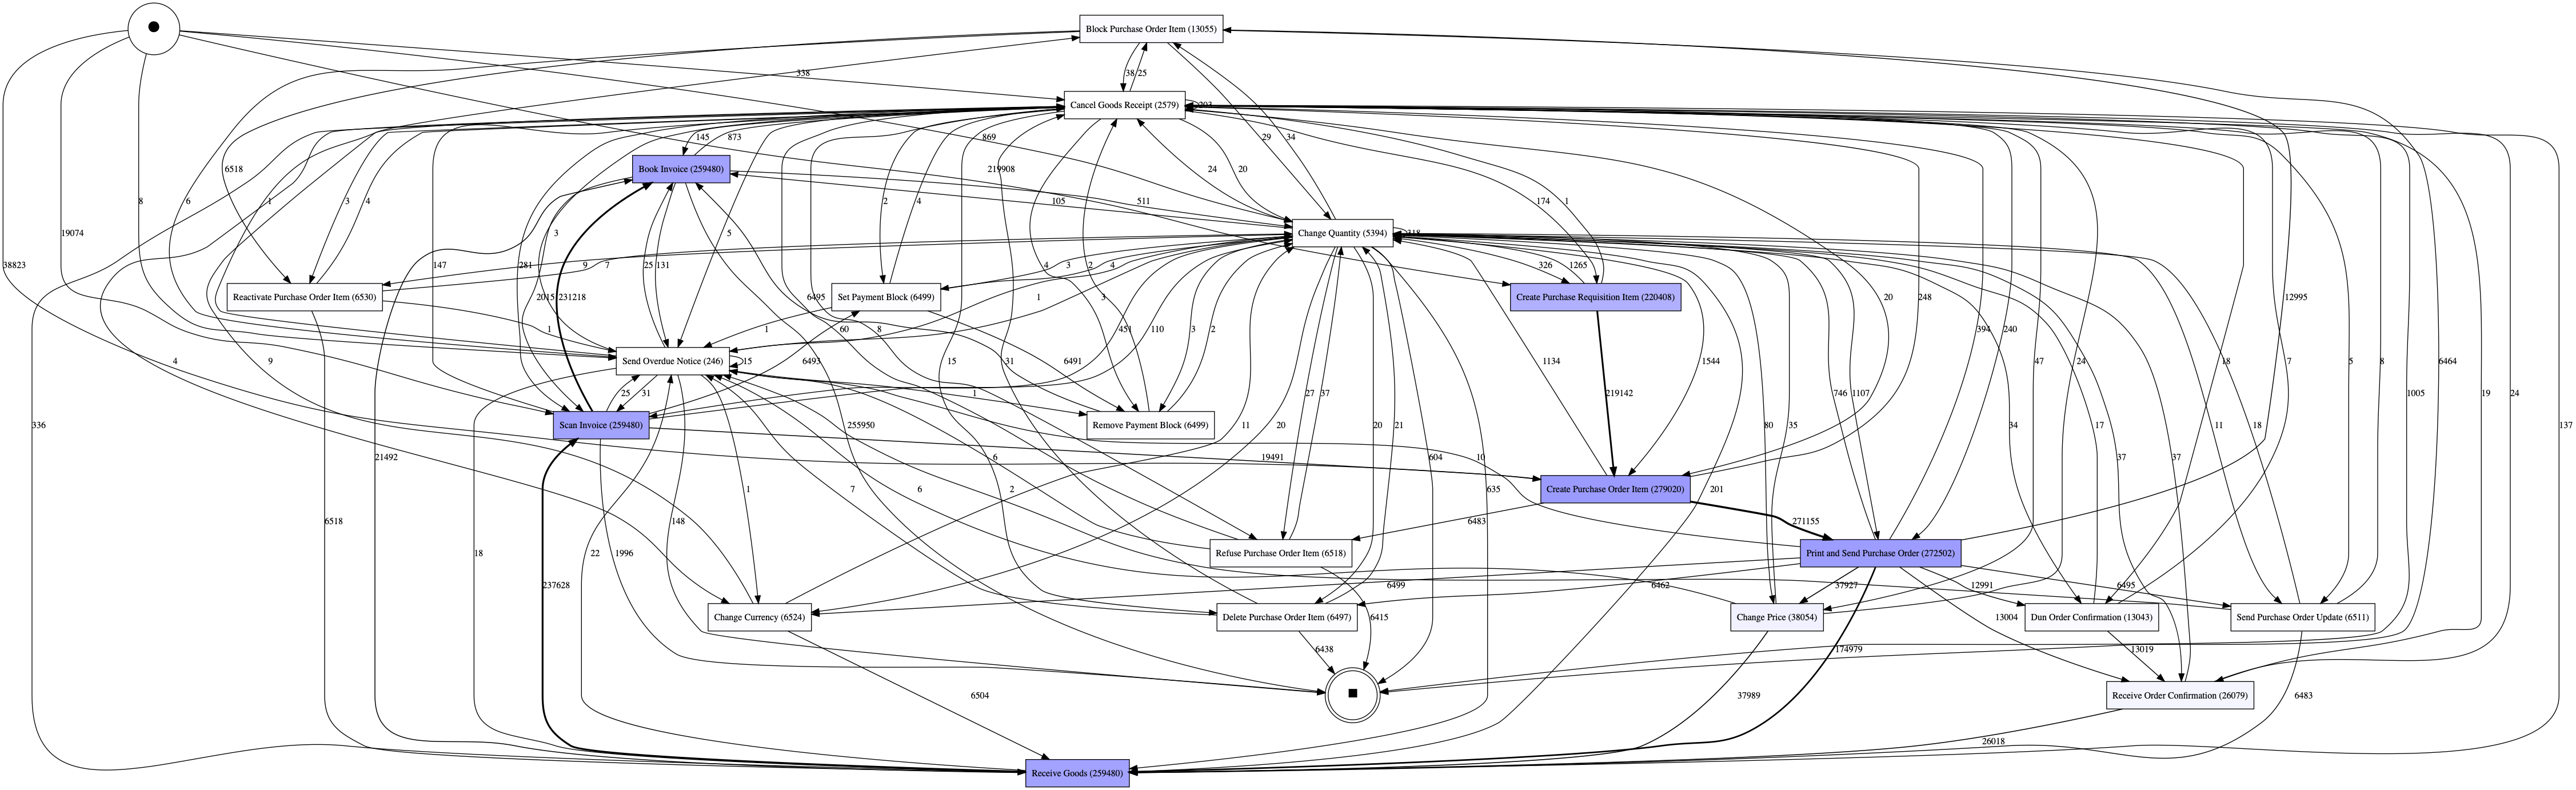

In [14]:
pm4py.view_dfg(net,im,fm)

In [9]:
query = PQL()
query += PQLColumn(query='"_CEL_P2P_ACTIVITIES_EN_parquet"."_CASE_KEY"', name="case:concept:name")
query += PQLColumn(query=' VARIANT ( "_CEL_P2P_ACTIVITIES_EN_parquet"."ACTIVITY_EN" )', name="case:variant")
query += PQLColumn(
        f'AVG ('
        f'  CALC_THROUGHPUT ( '
        f'      CASE_START TO CASE_END, '
        f'      REMAP_TIMESTAMPS ( "_CEL_P2P_ACTIVITIES_EN_parquet"."EVENTTIME", MINUTES ) '
        f'  ) '
        f')',
        "duration"
    )

In [10]:
df1 = sap_p2p._get_data_frame(query)

[2023-06-07 13:06:59] INFO: PQL Export started...
[2023-06-07 13:07:01] INFO: PQL Export status: DONE


In [11]:
df1

,case:concept:name,case:variant,duration
0,800000000006800001,"Create Purchase Requisition Item, Create Purch...",43200.0
1,800000000006800002,"Create Purchase Requisition Item, Create Purch...",40320.0
2,800000000006800003,"Create Purchase Requisition Item, Create Purch...",38880.0
3,800000000006800004,"Create Purchase Requisition Item, Create Purch...",44640.0
4,800000000006800005,"Create Purchase Requisition Item, Create Purch...",38880.0
...,...,...,...
279015,800000002797000010,"Create Purchase Requisition Item, Create Purch...",48960.0
279016,800000002797100001,"Create Purchase Order Item, Print and Send Pur...",31680.0
279017,800000002797100002,"Create Purchase Requisition Item, Create Purch...",44640.0
279018,800000002797100003,"Create Purchase Requisition Item, Create Purch...",43200.0


In [18]:
df1.to_csv('sap_p2p_duration.csv')

In [12]:
df1['case:concept:name'].unique().shape

(279020,)

In [13]:
df1['case:variant'].unique().shape

(562,)

In [14]:
df1['variant_id'] = df1.groupby(['case:variant']).ngroup()

In [15]:
df1

,case:concept:name,case:variant,duration,variant_id
0,800000000006800001,"Create Purchase Requisition Item, Create Purch...",43200.0,455
1,800000000006800002,"Create Purchase Requisition Item, Create Purch...",40320.0,455
2,800000000006800003,"Create Purchase Requisition Item, Create Purch...",38880.0,455
3,800000000006800004,"Create Purchase Requisition Item, Create Purch...",44640.0,455
4,800000000006800005,"Create Purchase Requisition Item, Create Purch...",38880.0,455
...,...,...,...,...
279015,800000002797000010,"Create Purchase Requisition Item, Create Purch...",48960.0,363
279016,800000002797100001,"Create Purchase Order Item, Print and Send Pur...",31680.0,142
279017,800000002797100002,"Create Purchase Requisition Item, Create Purch...",44640.0,363
279018,800000002797100003,"Create Purchase Requisition Item, Create Purch...",43200.0,363


In [16]:
var_id_dict = dict(zip(df1['case:variant'], df1['variant_id']))

In [17]:
ranking_inp = dict(df1.groupby('variant_id')['duration'].apply(list))

In [18]:
ranking_inp_ = {}
for k,v in ranking_inp.items():
    if len(v)>100:
        ranking_inp_[str(k)] = v

In [19]:
for k, v in ranking_inp_.items():
    print(len(v))

135
244
140
233
171
109
38089
116
151
578
122
448
6343
6359
180
6335
37270
337
6318
1947
10704
103
107688
374
179
6309
12684
6327
6336
18938


In [20]:
len(ranking_inp_)

30

In [21]:
random.seed(30)
mv = MeasurementsVisualizer(ranking_inp_, list(ranking_inp_.keys()))

[2023-06-07 13:07:29] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


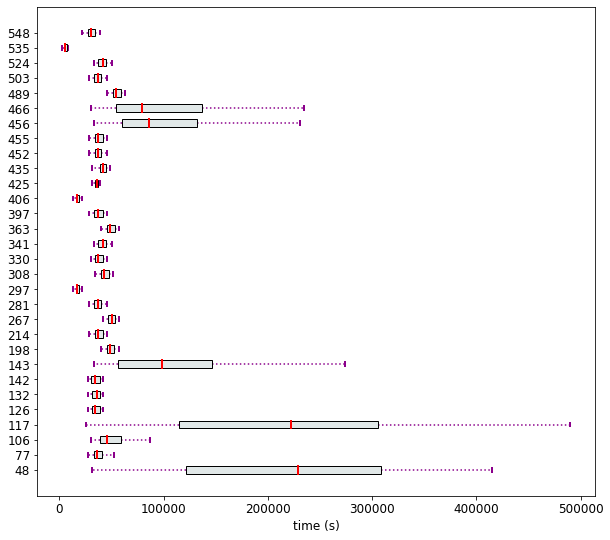

In [22]:
fig = mv.show_measurements_boxplots(scale=0.3)

In [23]:
rvDFG = RankVariantsDFGTr(ranking_inp_, list(ranking_inp_.keys()))
df_ranks = rvDFG.rank_variants()
df_ranks

[2023-06-07 13:07:37] INFO: NumExpr defaulting to 8 threads.


,case:concept:name,case:rank:q75-q25
0,535,0
1,297,1
2,406,1
3,77,2
4,126,2
5,132,2
6,142,2
7,214,2
8,281,2
9,330,2


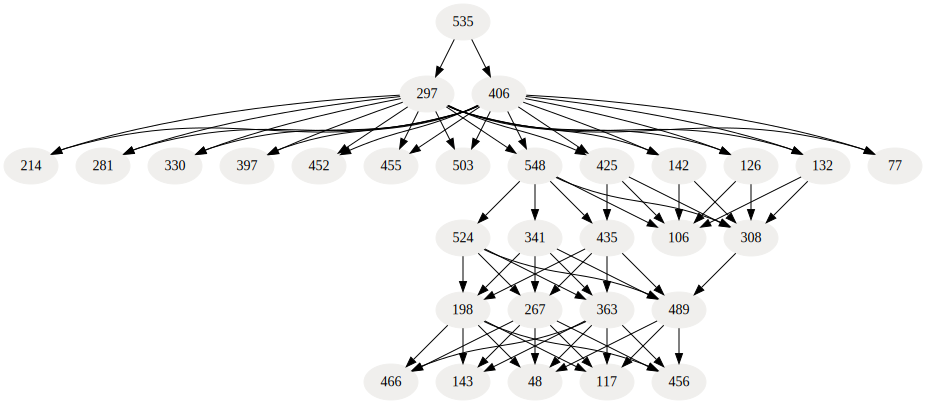

In [24]:
rvDFG.graph.transitivity_reduction()
g = rvDFG.graph.visualize()
g

In [98]:
g.render(filename='bpi-eg-dfg', format='svg')

'bpi-eg-dfg.svg'

[2023-06-07 13:07:47] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


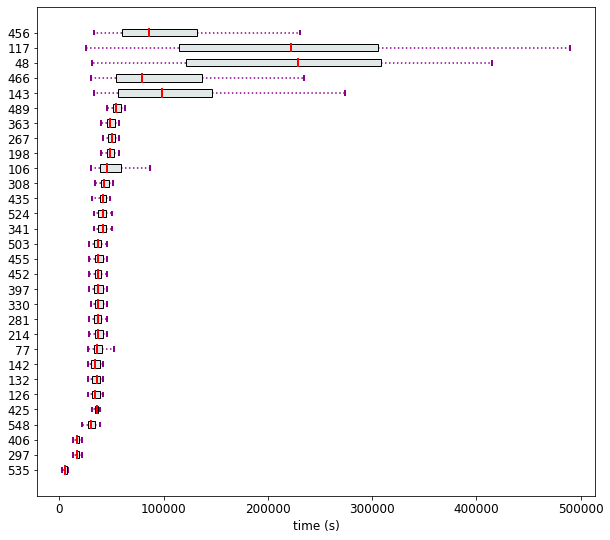

In [25]:
h0_ = rvDFG.graph.get_separable_arrangement()
random.seed(30)
mv = MeasurementsVisualizer(ranking_inp_, h0_)
fig = mv.show_measurements_boxplots(scale=0.3)

In [96]:
fig.savefig("bpi-eg.svg", format="svg", bbox_inches="tight")

In [44]:
rv2 = RankVariantsSort2(ranking_inp, h0_)
rv2.rank_variants()

,case:concept:name,case:rank:q75-q25
0,535,0
1,297,1
2,406,1
3,548,2
4,425,2
5,126,2
6,132,2
7,142,2
8,77,2
9,214,2


In [54]:
#rvDFG.graph.transitivity_reduction()
#g = rvDFG.graph.visualize()
#g

In [27]:
#ranks = RankVariantsSort2(ranking_inp, list(ranking_inp.keys()))

In [28]:
#df_ranks = ranks.rank_variants()

In [26]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_ranks

,case:concept:name,case:rank:q75-q25
0,535,0
1,297,1
2,406,1
3,77,2
4,126,2
5,132,2
6,142,2
7,214,2
8,281,2
9,330,2


In [37]:
best = df_ranks[df_ranks.iloc[:,1]<=2]['case:concept:name'].tolist()
worst = df_ranks[df_ranks.iloc[:,1]>=5]['case:concept:name'].tolist()

In [38]:
best = list(map(int, best))
worst = list(map(int, worst))
best, worst

([535,
  297,
  406,
  77,
  126,
  132,
  142,
  214,
  281,
  330,
  397,
  425,
  452,
  455,
  503,
  548],
 [48, 117, 143, 456, 466])

In [39]:
df['case:variant_id'] = df.apply(lambda x: var_id_dict[x['case:variant']], axis=1)

In [40]:
df_ = df.drop(columns=['case:variant'])
#df_

In [41]:
log_ = pm4py.convert_to_event_log(df_)

In [89]:
log_

[{'attributes': {'concept:name': '800000000006800001', 'variant_id': 455}, 'events': [{'concept:name': 'Create Purchase Requisition Item', 'timestamp': Timestamp('2008-12-31 07:44:05')}, '..', {'concept:name': 'Book Invoice', 'timestamp': Timestamp('2009-01-30 07:44:05')}]}, '....', {'attributes': {'concept:name': '800000002797100004', 'variant_id': 142}, 'events': [{'concept:name': 'Create Purchase Order Item', 'timestamp': Timestamp('2009-09-24 15:33:03')}, '..', {'concept:name': 'Book Invoice', 'timestamp': Timestamp('2009-10-20 15:33:03')}]}]

In [90]:
#activity_names = set(event['concept:name'] for trace in log_ for event in trace)

In [91]:
#activity_names

In [42]:
vc = VariantsCompare(log_, best, worst, variants_id_key='variant_id')

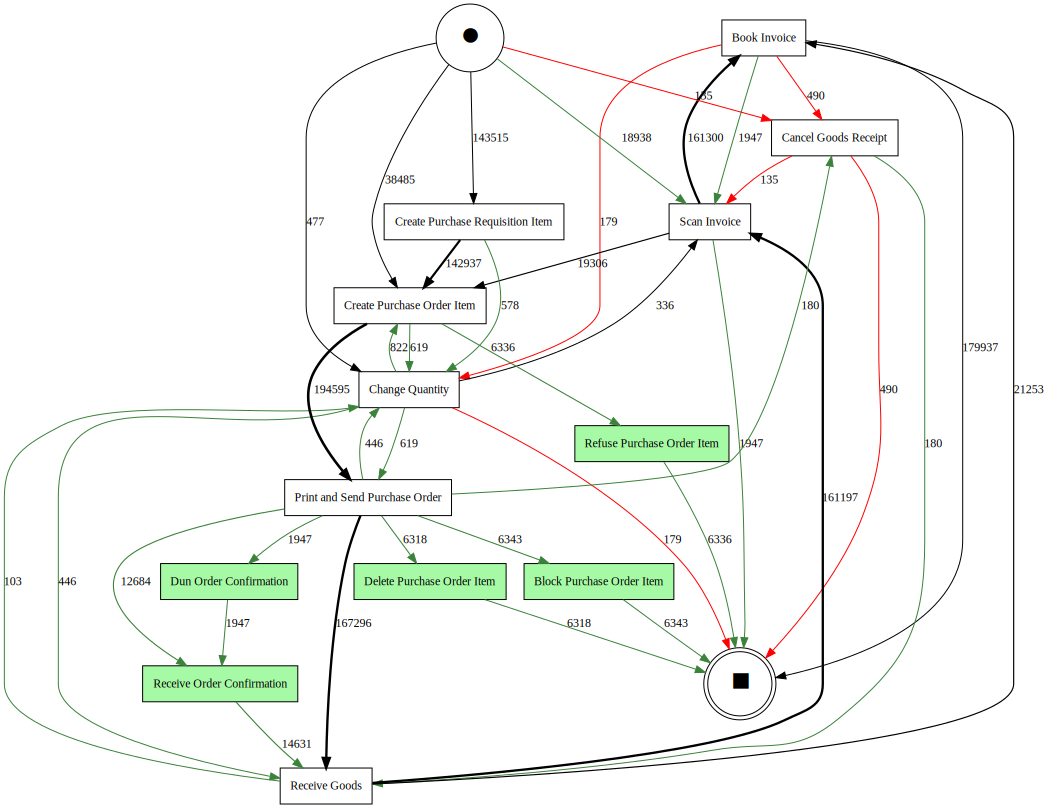

In [43]:
g1 = vc.get_dfg_minus_best_worst()
g1

In [44]:
g1.render(filename='bpi-eg-vc', format='pdf')

'bpi-eg-vc.pdf'

In [35]:
gg = vc.dfg_compare.get_dfg()

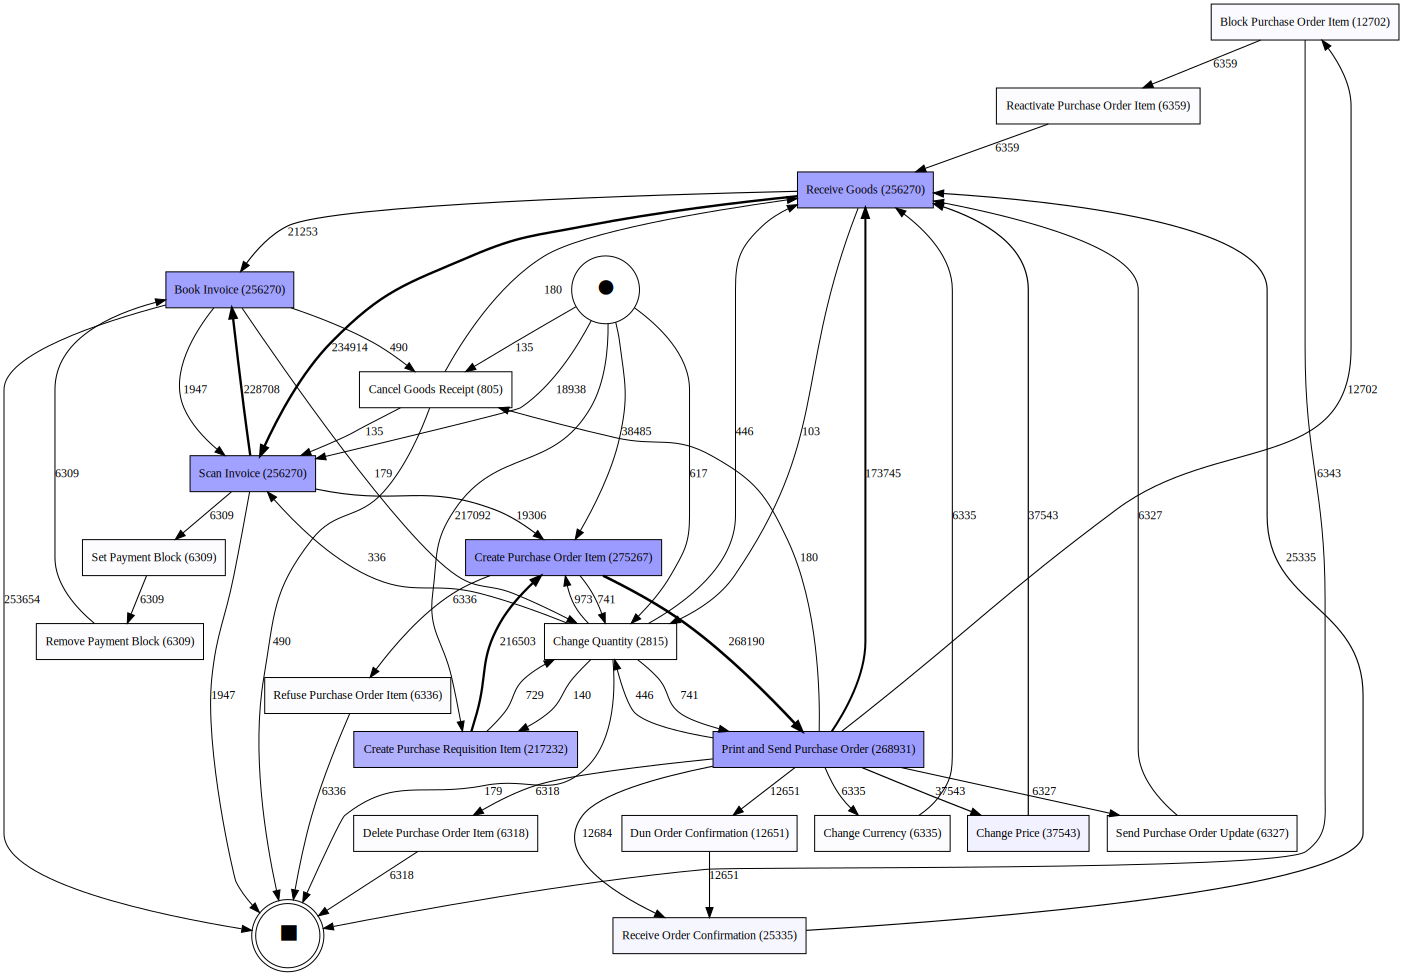

In [36]:
gg

In [109]:
import pygraphviz as pgv

In [110]:
gg_p = pgv.AGraph(gg.source)

In [112]:
for node in gg_p.nodes():
    label = 
    print(node.attr['label'])

Block Purchase Order Item (6381)
Book Invoice (183066)
Cancel Goods Receipt (1258)
Change Price (128)
Change Quantity (2566)
Create Purchase Order Item (202224)
Create Purchase Requisition Item (144115)
Delete Purchase Order Item (6351)
Dun Order Confirmation (1980)
Print and Send Purchase Order (195798)
Receive Goods (183066)
Receive Order Confirmation (14781)
Refuse Purchase Order Item (6426)
Scan Invoice (183066)
Send Overdue Notice (57)
&#9679;
&#9632;


In [122]:
activity_names = set(event['concept:name'] for trace in vc.log_filtered for event in trace)

In [123]:
activity_names

{'Block Purchase Order Item',
 'Book Invoice',
 'Cancel Goods Receipt',
 'Change Price',
 'Change Quantity',
 'Create Purchase Order Item',
 'Create Purchase Requisition Item',
 'Delete Purchase Order Item',
 'Dun Order Confirmation',
 'Print and Send Purchase Order',
 'Receive Goods',
 'Receive Order Confirmation',
 'Refuse Purchase Order Item',
 'Scan Invoice',
 'Send Overdue Notice'}

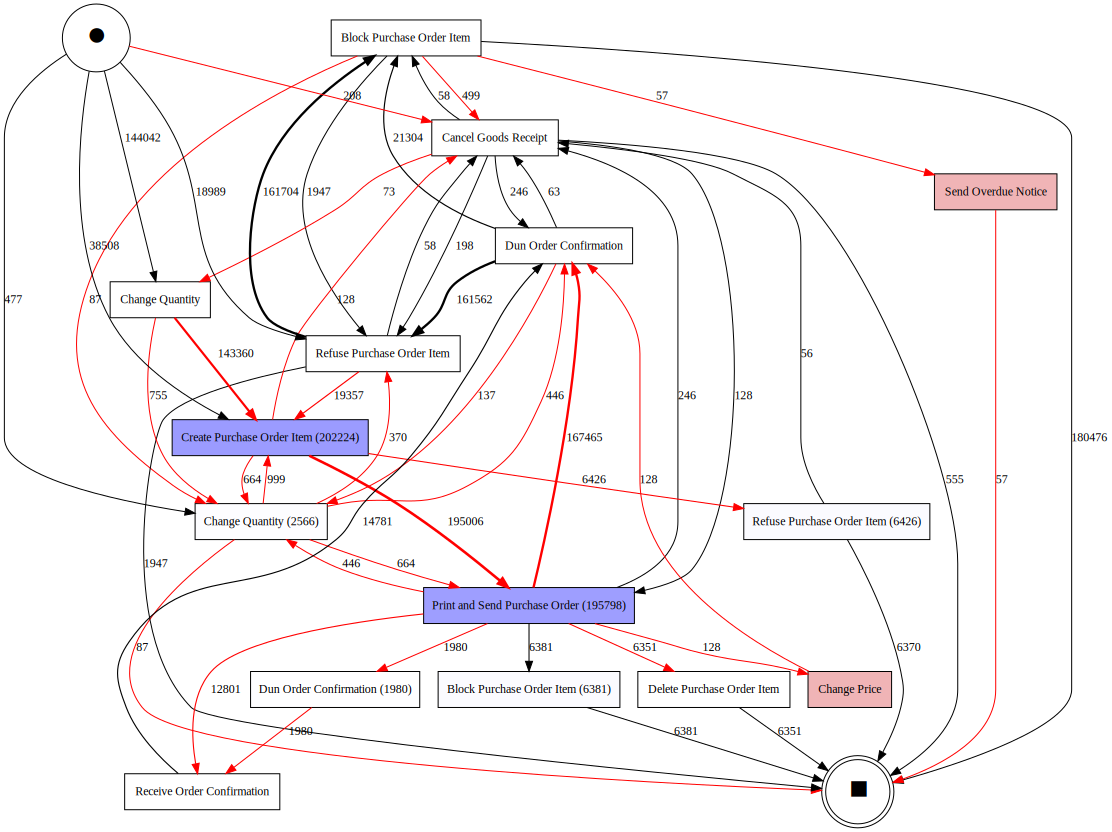

In [118]:
vc.get_dfg_minus_best()

In [120]:
g1_node_id = {}
g1_node_label = {}
for node in gg_p.nodes():
    #skip start and end nodes
    if '@@' not in node.name:

        for i in range(3,8):
            if node.attr['label'][-i] == '(':     
                label = node.attr['label'][:-i]
                break

        g1_node_id[label] = node.name
        g1_node_label[node.name] = label
    else:
        g1_node_id[node.name] = node.name
        g1_node_label[node.name] = node.name

In [125]:
g1_node_label

{'3190134884619511848': 'Block Purchase Order Item ',
 '7367219880910130530': 'Block Purchase Order Item ',
 '-2876413411990875208': 'Cancel Goods Receipt ',
 '-4296783295130763830': 'Change Price ',
 '-7163867556429561307': 'Change Quantity ',
 '-325414542793132523': 'Change Quantity ',
 '-7695628547485732763': 'Change Quantity ',
 '1120414795647525481': 'Delete Purchase Order Item ',
 '81168388705687335': 'Dun Order Confirmation ',
 '-4178905738667755481': 'Dun Order Confirmation ',
 '-3845357658145215075': 'Dun Order Confirmation ',
 '6268577830845481588': 'Receive Order Confirmation ',
 '-4297097102290498873': 'Refuse Purchase Order Item ',
 '7056497871031905269': 'Refuse Purchase Order Item ',
 '7987336566172024709': 'Send Overdue Notice ',
 '@@startnode': '@@startnode',
 '@@endnode': '@@endnode'}

In [124]:
gg_p.nodes()

['3190134884619511848',
 '7367219880910130530',
 '-2876413411990875208',
 '-4296783295130763830',
 '-7163867556429561307',
 '-325414542793132523',
 '-7695628547485732763',
 '1120414795647525481',
 '81168388705687335',
 '-4178905738667755481',
 '-3845357658145215075',
 '6268577830845481588',
 '-4297097102290498873',
 '7056497871031905269',
 '7987336566172024709',
 '@@startnode',
 '@@endnode']